In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

import torch
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [83]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter64/MAML_filter64_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_filter64/MAML+Arbiter_5way_5shot_filter64_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
maml_per_inner_loop_step = maml_norm_info_train.groupby('num_step')
arbiter_per_inner_loop_step = arbiter_norm_info_train.groupby('num_step')

# 1. GSNR

## 1-1) 전체 GSNR

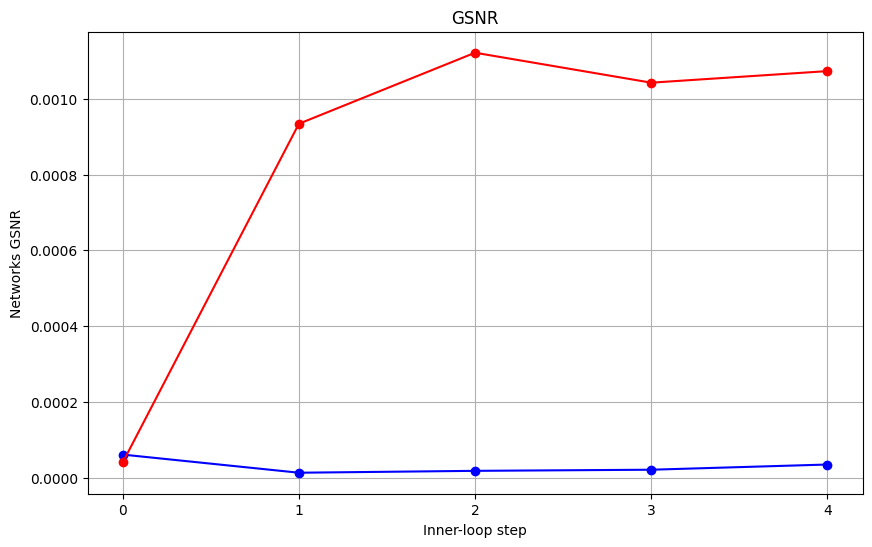

In [85]:
maml_mean_df = maml_per_inner_loop_step['gsnr'].mean()
maml_variance_df = maml_per_inner_loop_step['gsnr'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['gsnr'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['gsnr'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, maml_group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('Networks GSNR')
plt.title('GSNR')


# 격자무늬 추가
plt.grid(True)

# 그래프를 표시합니다
plt.show()

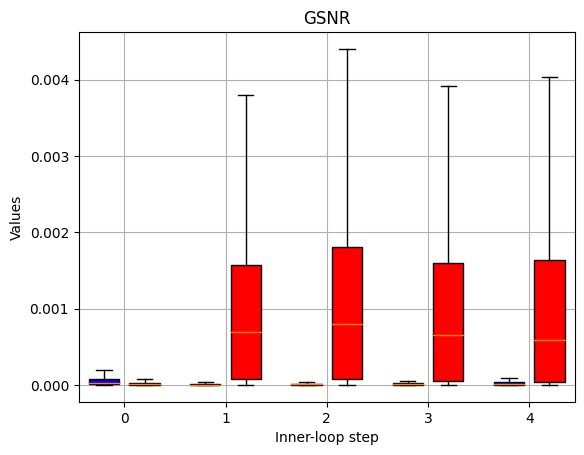

In [86]:
# 이상치 제거 함수 정의
def remove_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

group_names = []
filtered_values_1 = []
filtered_values_2 = []

for name, group in maml_per_inner_loop_step:
    group_values = group['gsnr']
    #group_values = remove_outliers(group_values)
    filtered_values_1.append(group_values)
    
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)
        
for name, group in arbiter_per_inner_loop_step:
    group_values = group['gsnr']
    #group_values = remove_outliers(group_values)
    filtered_values_2.append(group_values)

    
# 두 개의 박스플롯을 같은 x축에 그리기 위해 위치 조정
positions_1 = [i * 2.0 for i in range(len(filtered_values_1))]
positions_2 = [i * 2.0 + 0.8 for i in range(len(filtered_values_2))]

# 첫 번째 박스플롯
plt.boxplot(filtered_values_1, positions=positions_1, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='blue'), showfliers=False)

# 두 번째 박스플롯
plt.boxplot(filtered_values_2, positions=positions_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks([i * 2.0 + 0.4 for i in range(len(group_names))], group_names)

# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Values')
plt.title('GSNR')

# 격자무늬 추가
plt.grid(True)

# 그래프를 표시합니다
plt.show()

# 2. Weight norm

## 2-1) 꺾은선 그래프

### All Weight norm

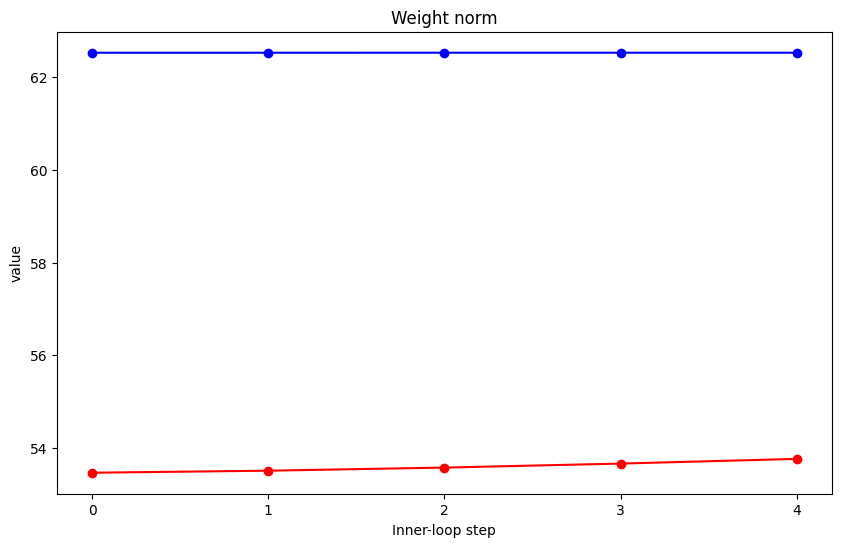

In [134]:
maml_mean_df = maml_per_inner_loop_step['all_weights_norm'].mean()
maml_variance_df = maml_per_inner_loop_step['all_weights_norm'].var()
maml_std_dev_df = maml_variance_df**0.5

arbiter_mean_df = arbiter_per_inner_loop_step['all_weights_norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['all_weights_norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5


# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)

# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

## y축을 로그 스케일로 설정
# plt.yscale('log')

# 그래프를 표시합니다
plt.show()

### Conv1 Weight norm

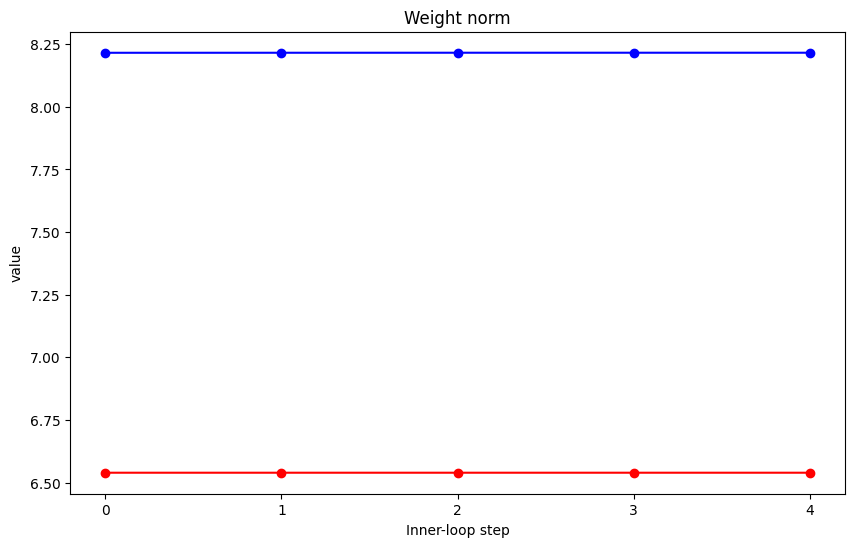

In [88]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv0.conv.weight_weight_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv0.conv.weight_weight_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv0.conv.weight_weight_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv0.conv.weight_weight_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5


# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# 데이터에 로그 변환 적용
/

# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

## y축을 로그 스케일로 설정
# plt.yscale('log')

# 그래프를 표시합니다
plt.show()

### Conv2 Weight norm

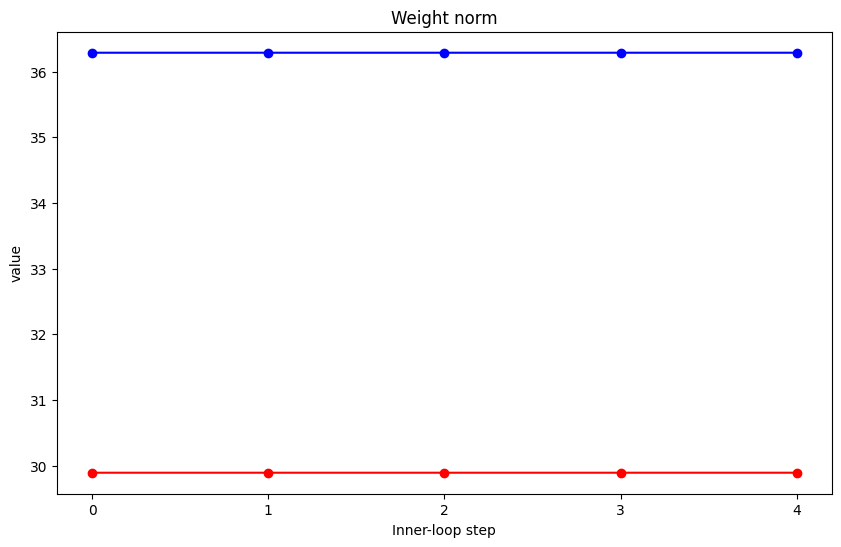

In [89]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv1.conv.weight_weight_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv1.conv.weight_weight_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv1.conv.weight_weight_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv1.conv.weight_weight_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5


# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# 데이터에 로그 변환 적용
/

# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

## y축을 로그 스케일로 설정
# plt.yscale('log')

# 그래프를 표시합니다
plt.show()

### Conv3 Weight norm

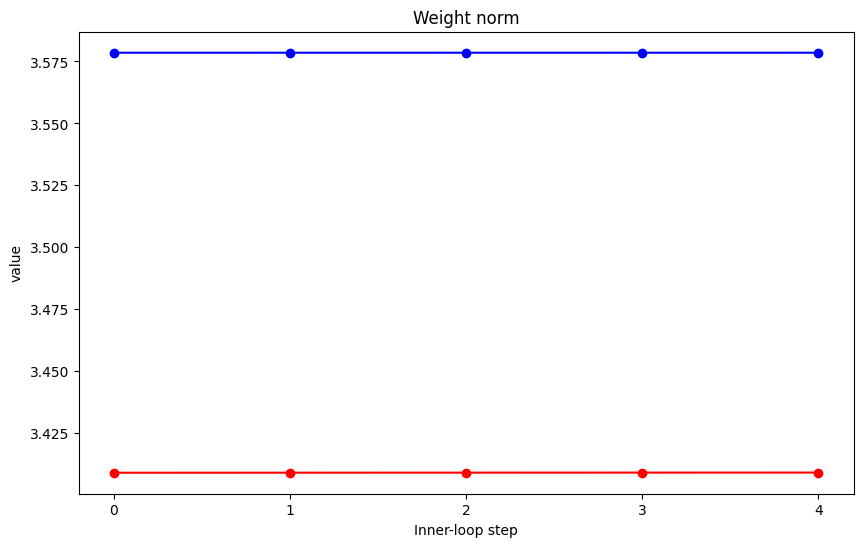

In [129]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv2.conv.weight_weight_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv2.conv.weight_weight_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv2.conv.weight_weight_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv2.conv.weight_weight_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5


# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

## y축을 로그 스케일로 설정
# plt.yscale('log')

# 그래프를 표시합니다
plt.show()

### Conv4 Weight norm

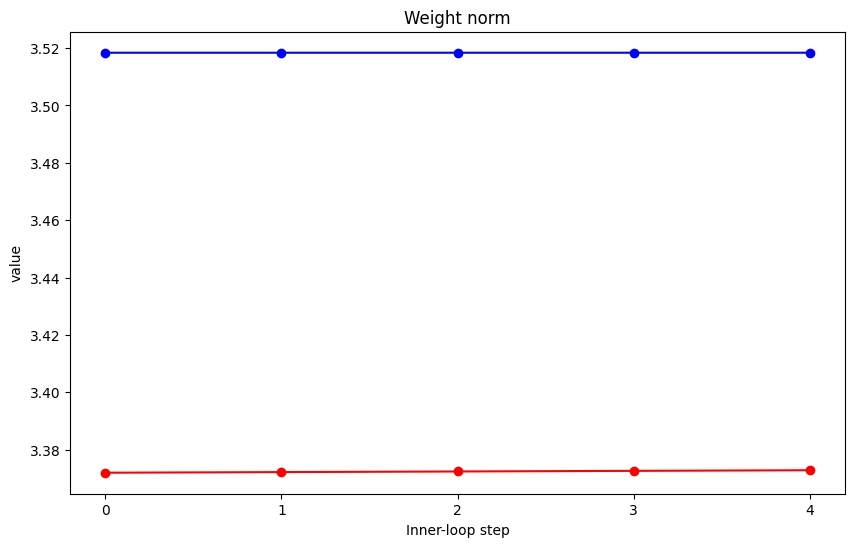

In [125]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv3.conv.weight_weight_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5


# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

## y축을 로그 스케일로 설정
# plt.yscale('log')

# 그래프를 표시합니다
plt.show()

### Head Weight norm

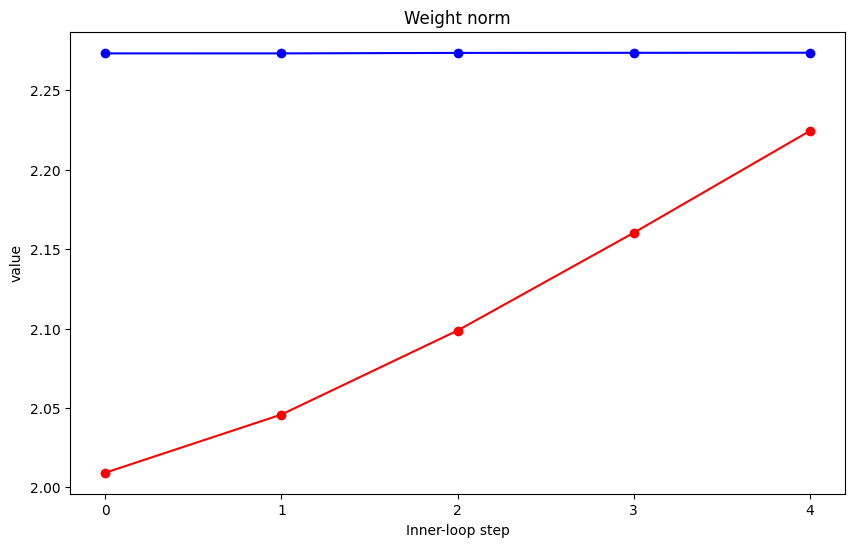

In [124]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.linear.weights_weight_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.linear.weights_weight_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.linear.weights_weight_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.linear.weights_weight_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5


# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight norm')

## y축을 로그 스케일로 설정
# plt.yscale('log')

# 그래프를 표시합니다
plt.show()

## 2-2) Boxplot

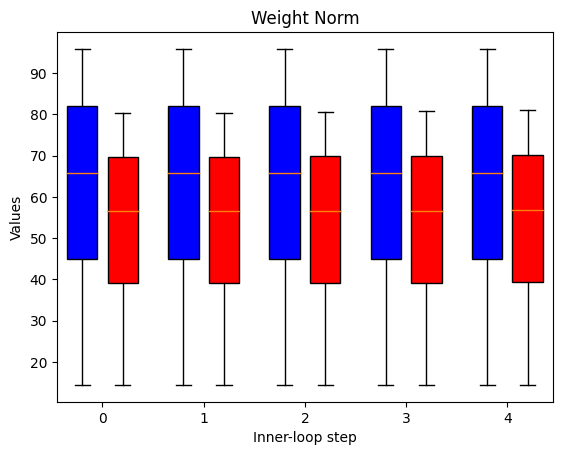

In [93]:
# 이상치 제거 함수 정의
def remove_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

group_names = []
filtered_values_1 = []
filtered_values_2 = []

for name, group in maml_per_inner_loop_step:
    group_values = group['all_weights_norm']
    #group_values = remove_outliers(group_values)
    filtered_values_1.append(group_values)
    
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)
        
for name, group in arbiter_per_inner_loop_step:
    group_values = group['all_weights_norm']
    #group_values = remove_outliers(group_values)
    filtered_values_2.append(group_values)

    
# 두 개의 박스플롯을 같은 x축에 그리기 위해 위치 조정
positions_1 = [i * 2.0 for i in range(len(filtered_values_1))]
positions_2 = [i * 2.0 + 0.8 for i in range(len(filtered_values_2))]



# 첫 번째 박스플롯
plt.boxplot(filtered_values_1, positions=positions_1, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='blue'), showfliers=False)

# 두 번째 박스플롯
plt.boxplot(filtered_values_2, positions=positions_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks([i * 2.0 + 0.4 for i in range(len(group_names))], group_names)

# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Values')
plt.title('Weight Norm')

# 그래프를 표시합니다
plt.show()

# 3. Weight Variance

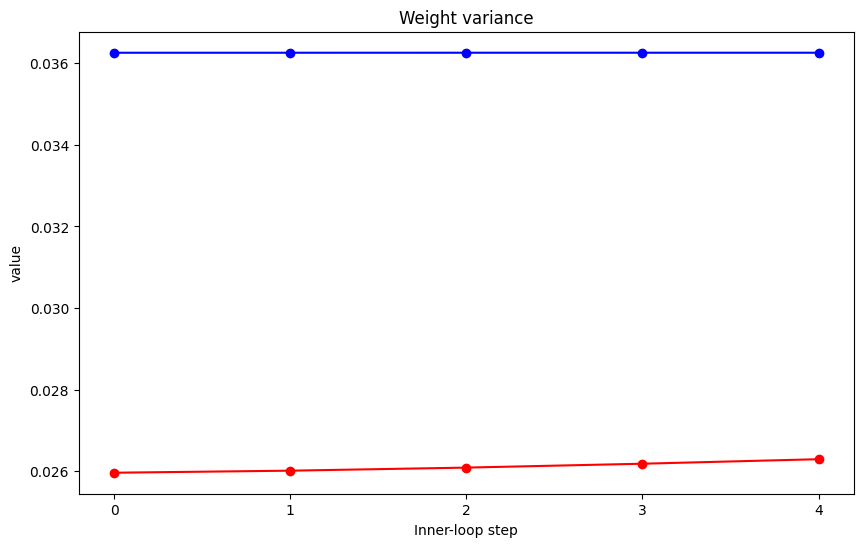

In [94]:
maml_mean_df = maml_per_inner_loop_step['all_weights_var'].mean()
maml_variance_df = maml_per_inner_loop_step['all_weights_var'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['all_weights_var'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['all_weights_var'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='Mean')
plt.plot(x, arbiter_means, '-o', color='r', label='Mean')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Weight variance')

# 그래프를 표시합니다
plt.show()

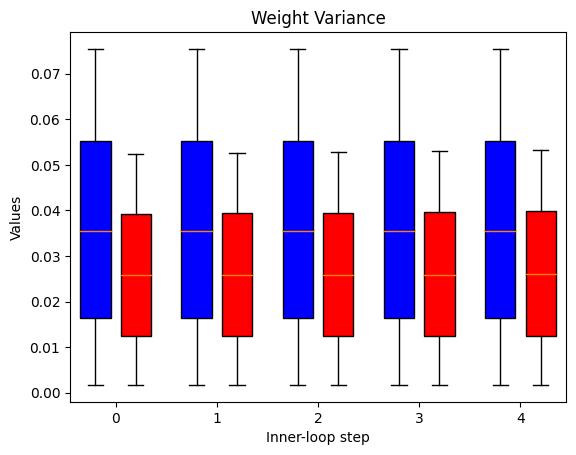

In [95]:
# 이상치 제거 함수 정의
def remove_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

group_names = []
filtered_values_1 = []
filtered_values_2 = []

for name, group in maml_per_inner_loop_step:
    group_values = group['all_weights_var']
    #group_values = remove_outliers(group_values)
    filtered_values_1.append(group_values)
    
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)
        
for name, group in arbiter_per_inner_loop_step:
    group_values = group['all_weights_var']
    #group_values = remove_outliers(group_values)
    filtered_values_2.append(group_values)

    
# 두 개의 박스플롯을 같은 x축에 그리기 위해 위치 조정
positions_1 = [i * 2.0 for i in range(len(filtered_values_1))]
positions_2 = [i * 2.0 + 0.8 for i in range(len(filtered_values_2))]



# 첫 번째 박스플롯
plt.boxplot(filtered_values_1, positions=positions_1, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='blue'), showfliers=False)

# 두 번째 박스플롯
plt.boxplot(filtered_values_2, positions=positions_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks([i * 2.0 + 0.4 for i in range(len(group_names))], group_names)

# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Values')
plt.title('Weight Variance')

# 그래프를 표시합니다
plt.show()

# 4. Gradient norm

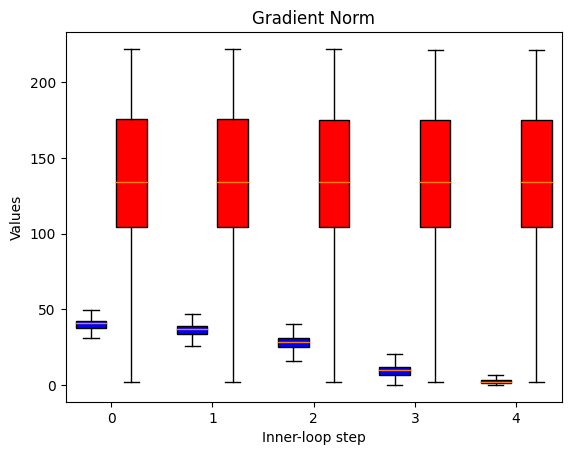

In [96]:
# 이상치 제거 함수 정의
def remove_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

group_names = []
filtered_values_1 = []
filtered_values_2 = []

for name, group in maml_per_inner_loop_step:
    group_values = group['all_grads_l2norm']
    #group_values = remove_outliers(group_values)
    filtered_values_1.append(group_values)
    
    # 그룹 이름을 저장 (모든 그룹은 동일한 순서로 추가됨)
    if name not in group_names:
        group_names.append(name)
        
for name, group in arbiter_per_inner_loop_step:
    group_values = group['all_grads_l2norm']
    #group_values = remove_outliers(group_values)
    filtered_values_2.append(group_values)

    
# 두 개의 박스플롯을 같은 x축에 그리기 위해 위치 조정
positions_1 = [i * 2.0 for i in range(len(filtered_values_1))]
positions_2 = [i * 2.0 + 0.8 for i in range(len(filtered_values_2))]



# 첫 번째 박스플롯
plt.boxplot(filtered_values_1, positions=positions_1, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='blue'), showfliers=False)

# 두 번째 박스플롯
plt.boxplot(filtered_values_2, positions=positions_2, widths=0.6, patch_artist=True,
            boxprops=dict(facecolor='red'), showfliers=False)

# x축 라벨 설정
plt.xticks([i * 2.0 + 0.4 for i in range(len(group_names))], group_names)

# 그래프 라벨 및 제목 설정
plt.xlabel('Inner-loop step')
plt.ylabel('Values')
plt.title('Gradient Norm')

# 그래프를 표시합니다
plt.show()

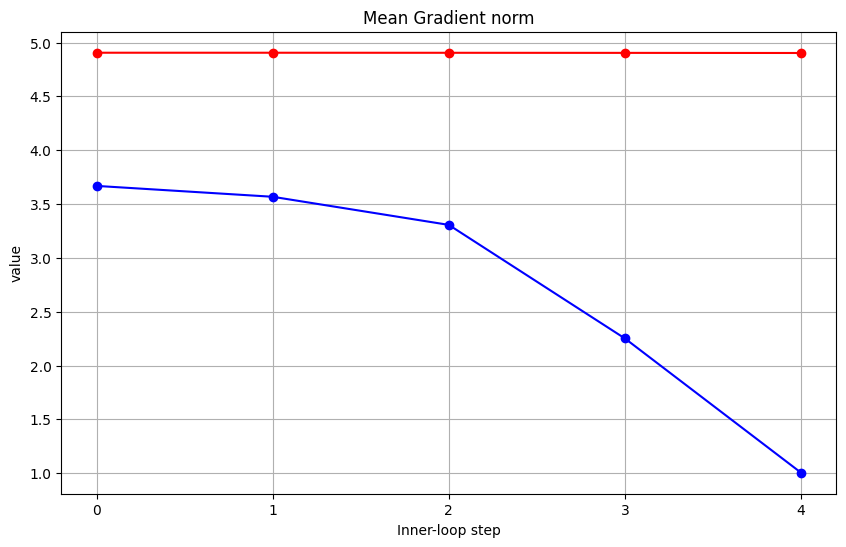

In [123]:
maml_mean_df = maml_per_inner_loop_step['all_grads_l2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['all_grads_l2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['all_grads_l2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['all_grads_l2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values

# # 데이터에 로그 변환 적용
# maml_means = np.log(maml_means)
# arbiter_means = np.log(arbiter_means)

# x축 값을 생성합니다
x = range(len(maml_group_names))

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)

# # 데이터에 로그 변환 적용
# maml_std_devs = np.log(maml_std_devs)
# arbiter_std_devs = np.log(arbiter_std_devs)

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# # 표준 편차 범위를 그림자로 표시합니다
# plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
# plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Mean Gradient norm')

# 격자무늬 추가
plt.grid(True)

# # y축을 로그 스케일로 설정
# plt.yscale('log')

# # y축 눈금 형식 변경
# plt.gca().yaxis.set_major_formatter(ScalarFormatter())
# plt.gca().yaxis.set_minor_formatter(ScalarFormatter())
# plt.gca().yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs='auto', numticks=10))

# 그래프를 표시합니다
plt.show()

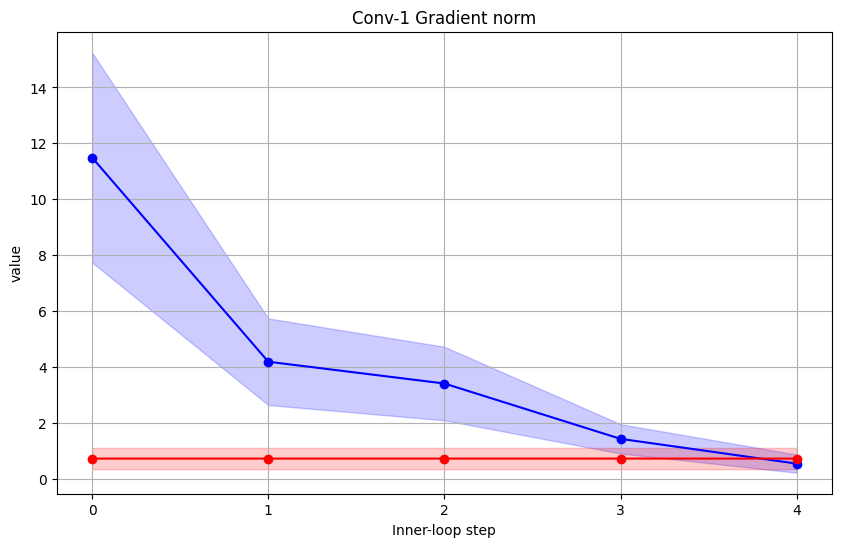

In [98]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv0.conv.weight_grad_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Conv-1 Gradient norm')

# 격자무늬 추가
plt.grid(True)

# y축을 로그 스케일로 설정
#plt.yscale('log')

# 그래프를 표시합니다
plt.show()

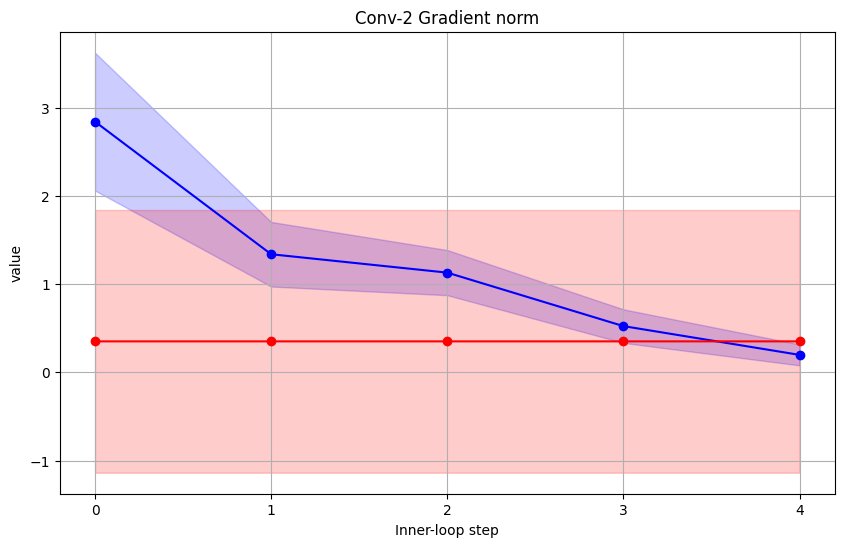

In [99]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv1.conv.weight_grad_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv1.conv.weight_grad_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv1.conv.weight_grad_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv1.conv.weight_grad_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Conv-2 Gradient norm')

# 격자무늬 추가
plt.grid(True)

# y축을 로그 스케일로 설정
#plt.yscale('log')

# 그래프를 표시합니다
plt.show()

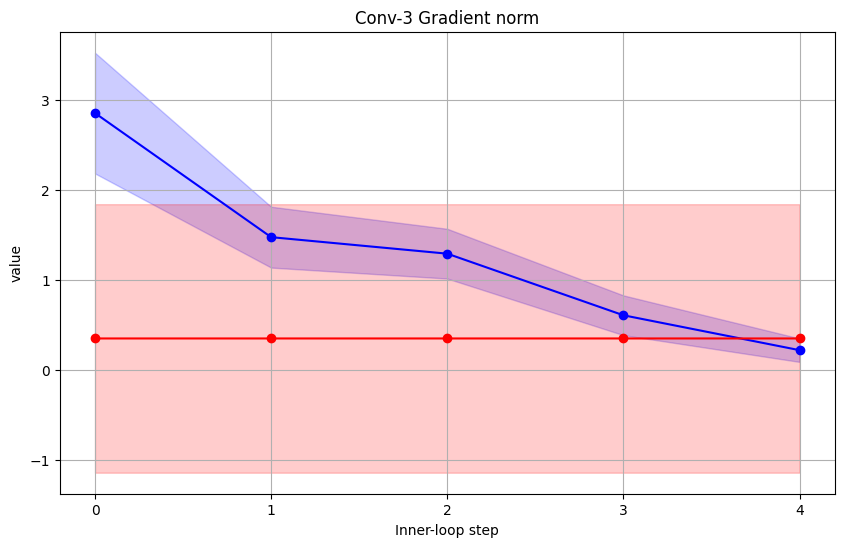

In [100]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv2.conv.weight_grad_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv2.conv.weight_grad_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv1.conv.weight_grad_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv1.conv.weight_grad_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Conv-3 Gradient norm')

# 격자무늬 추가
plt.grid(True)

# y축을 로그 스케일로 설정
#plt.yscale('log')

# 그래프를 표시합니다
plt.show()

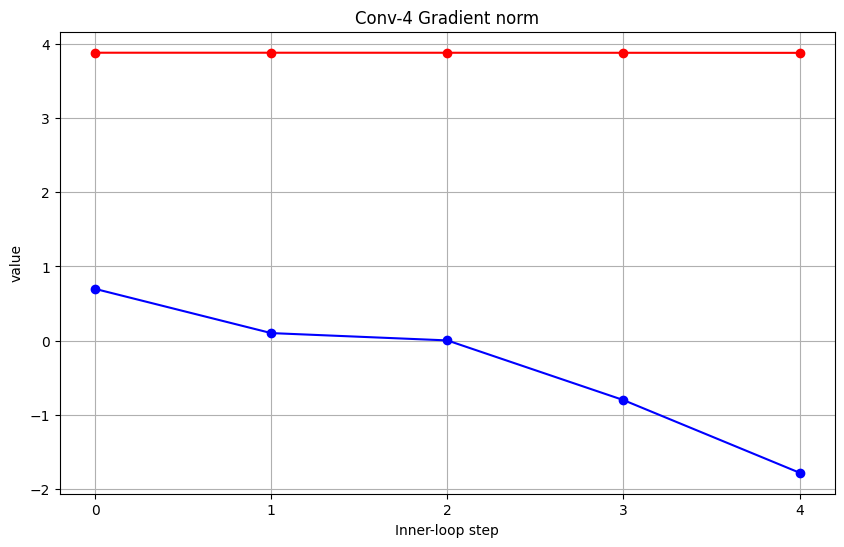

In [136]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.conv3.conv.weight_grad_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 데이터에 로그 변환 적용
maml_means = np.log(maml_means)
arbiter_means = np.log(arbiter_means)


# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
#plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
#plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Conv-4 Gradient norm')

# 격자무늬 추가
plt.grid(True)

# y축을 로그 스케일로 설정
#plt.yscale('log')

# 그래프를 표시합니다
plt.show()

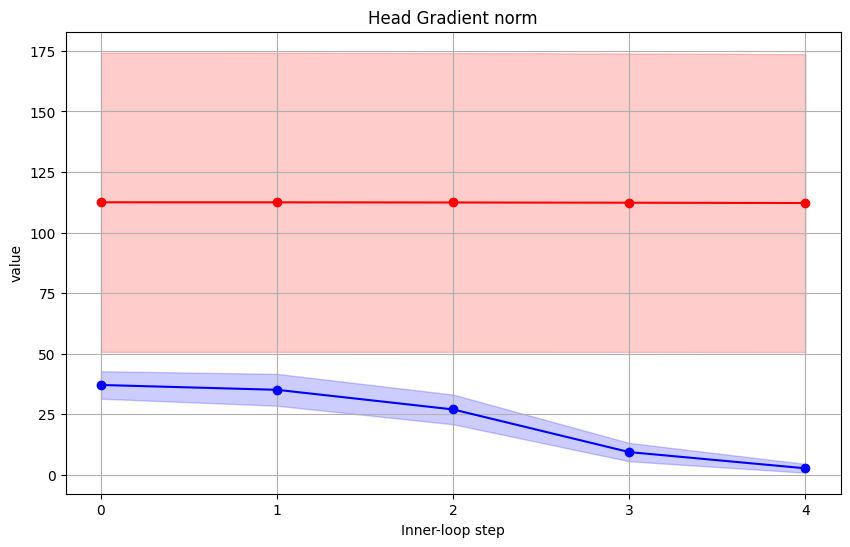

In [102]:
maml_mean_df = maml_per_inner_loop_step['layer_dict.linear.weights_grad_L2norm'].mean()
maml_variance_df = maml_per_inner_loop_step['layer_dict.linear.weights_grad_L2norm'].var()
maml_std_dev_df = maml_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
maml_group_names = maml_mean_df.index.tolist()
maml_means = maml_mean_df.values
maml_std_devs = maml_std_dev_df.values

arbiter_mean_df = arbiter_per_inner_loop_step['layer_dict.linear.weights_grad_L2norm'].mean()
arbiter_variance_df = arbiter_per_inner_loop_step['layer_dict.linear.weights_grad_L2norm'].var()
arbiter_std_dev_df = arbiter_variance_df**0.5

# 그룹 이름과 평균 및 표준 편차를 리스트로 추출합니다
arbiter_group_names = arbiter_mean_df.index.tolist()
arbiter_means = arbiter_mean_df.values
arbiter_std_devs = arbiter_std_dev_df.values


# x축 값을 생성합니다
x = range(len(maml_group_names))

# 꺾은선 그래프를 그립니다
plt.figure(figsize=(10, 6))
plt.plot(x, maml_means, '-o', color='b', label='MAML')
plt.plot(x, arbiter_means, '-o', color='r', label='Arbiter')

# 표준 편차 범위를 그림자로 표시합니다
plt.fill_between(x, maml_means - maml_std_devs, maml_means + maml_std_devs, color='b', alpha=0.2, label='Standard Deviation')
plt.fill_between(x, arbiter_means - arbiter_std_devs, arbiter_means + arbiter_std_devs, color='r', alpha=0.2, label='Standard Deviation')

plt.xticks(x, group_names)
plt.xlabel('Inner-loop step')
plt.ylabel('value')
plt.title('Head Gradient norm')

# 격자무늬 추가
plt.grid(True)

# y축을 로그 스케일로 설정
#plt.yscale('log')

# 그래프를 표시합니다
plt.show()